{0: [1], 2: [4, 3], 4: [3]}
{0: {}, 1: {0: {}}, 2: {}, 3: {4: {}, 2: {}}, 4: {2: {}}}
1 -> 0  my parents are 
3 -> 4  my parents are 
3 -> 2  my parents are 
4 -> 2  my parents are 


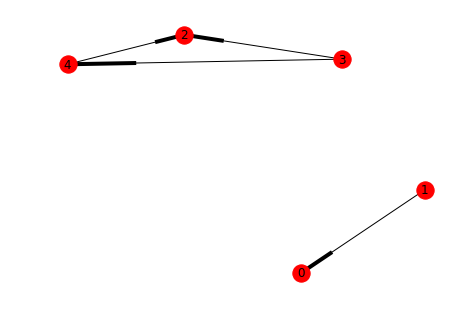

In [28]:
import networkx as nx
from random import randint

class RandomDAG:
    def __init__(self):
        self.randDAG = nx.DiGraph()
        
    # connected graph req (n-1) edges at least
    # DAG can't be more than n(n-1) edges
    # https://ipython.org/ipython-doc/3/parallel/dag_dependencies.html
    def random_dag(self, n_nodes, n_edges):
        self.n_nodes = n_nodes
        self.n_edges = n_edges
        child_parent = {}

        if n_edges > n_nodes * (n_nodes-1):
            self.n_edges = n_nodes * (n_nodes - 1)

        """Generate a random Directed Acyclic Graph (DAG) with a given number of nodes and edges."""
        self.randDAG = nx.DiGraph()
        # add nodes, labeled 0...nodes:
        for i in range(self.n_nodes):
            self.randDAG.add_node(i)
        round = 1000
        while self.n_edges > 0 and round > 0:
            round -= 1
            a = randint(0, self.n_nodes - 1)
            b = a
            while b == a or self.randDAG.has_edge(a,b):
                b = randint(0, self.n_nodes - 1)
            self.randDAG.add_edge(a, b)
            if nx.is_directed_acyclic_graph(self.randDAG):
                self.n_edges -= 1
                parent = child_parent.get(b)
                if  parent is None:
                    parent = [a]
                else:
                    parent.append(a)
                child_parent[b] = parent
                #print(a,"-> ", b)
            else:
                # we closed a loop!
                self.randDAG.remove_edge(a, b)
                
        return self.randDAG, child_parent


G,p = RandomDAG().random_dag(5,4)

print(p)
# print(G.nodes())
# print(G.neighbors(1))# childs
# print(G.adj)


nx.draw(G,with_labels = True)
# print(nx.is_directed_acyclic_graph(G)    )
edges_dict =G.edge
print(edges_dict)
for a in edges_dict.keys():
    for b in edges_dict[a].keys():
        print (a,"->", b, " my parents are ", )
